# Points of Interest

This notebook contains the processing of the OSM data into the POI features.

Rudolf Maculan
ETH Zurich
10-07-2017

In [1]:
import numpy as np
import pandas as pd 
from tqdm import tqdm
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pois_raw = pd.read_csv('/Users/rudimac/Documents/MTEC/THESIS/QGIS/csv/final/POI_count.csv')
grid = pd.read_csv('/Users/rudimac/Documents/MTEC/THESIS/QGIS/csv/final/GRID_final.csv').drop(
    ['xmin','xmax','ymin','ymax'],axis=1)

In [3]:
pois_raw[:15]

id             id_2          amenity
0   1428   node/665533346  vending_machine
1   1430   node/665533394             shop
2   1431   node/665533417             shop
3   1432   node/665533428  vending_machine
4   1735  node/4672943370             shop
5   2040   node/665858605         post_box
6   2040   node/665858607       restaurant
7   2040   node/665533325             shop
8   2040   node/665533331             shop
9   2041   node/665533355         fountain
10  2346   node/665533320  vending_machine
11  2346   node/662868164           school
12  2346   node/665858609     fire_station
13  2651   node/665862087        recycling
14  2659   node/369092583          parking

In [4]:
pois_raw.shape

(5840, 3)

In [5]:
col = pois_raw['amenity'].unique().tolist()
col.append('grid_id')
col = col[-1:] + col[:-1]

In [ ]:
pois = pd.DataFrame(data=np.zeros((len(grid),24),dtype='int8'),columns=col)
pois['grid_id'] = grid['id']
for row in tqdm(pois_raw.itertuples()):
    pois[row[3]].loc[pois['grid_id'] == row[1]] += 1

0it [00:00, ?it/s]/Users/rudimac/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
4839it [01:47, 46.10it/s]

In [8]:
pois.head()

grid_id  vending_machine  shop  post_box  restaurant  fountain  school  \
0     1425                0     0         0           0         0       0   
1     1426                0     0         0           0         0       0   
2     1427                0     0         0           0         0       0   
3     1428                1     0         0           0         0       0   
4     1429                0     0         0           0         0       0   

   fire_station  recycling  parking       ...         toilets  \
0             0          0        0       ...               0   
1             0          0        0       ...               0   
2             0          0        0       ...               0   
3             0          0        0       ...               0   
4             0          0        0       ...               0   

   bicycle_parking  hospital  pub  post_office  bar  cafe  kindergarten  \
0                0         0    0            0    0     0             0   
1                0         0    0            0    0     0             0   
2                0         0    0            0    0     0             0   
3                0         0    0            0    0     0             0   
4                0         0    0            0    0     0             0   

   police  social_facility  
0       0                0  
1       0                0  
2       0                0  
3       0                0  
4       0                0  

[5 rows x 24 columns]

In [9]:
pois.shape

(24378, 24)

In [10]:
pois = pois.set_index(pois['grid_id']).drop(['grid_id'],axis=1)

In [29]:
# COMBINE CATEGORIES
# poi_infra = vending_machine, fountain, post_box, recycling, waste_basket, atm, toilets, 
#             bicycle_parking, post_office, bank, parking
# poi_shop = shop
# poi_leisure = restaurant, bar, pub, cafe
# poi_public = fire_station, police, hospital, social_facility, place_of_worship
# poi_edu = school, kindergarten

pois_agg = pd.DataFrame(data=np.zeros((24378,5),dtype=int),columns=['poi_infra','poi_shop','poi_leisure','poi_public','poi_edu']
                       ,index=pois.index)
pois_agg['poi_infra'] = (pois ['vending_machine'] + pois ['fountain'] + pois ['post_box'] + pois ['recycling'] +
                        pois ['waste_basket'] + pois ['atm'] + pois ['toilets'] + pois ['bicycle_parking'] + 
                        pois ['post_office'] + pois ['bank'] + pois ['parking'])
pois_agg['poi_leisure'] = pois ['restaurant'] + pois ['bar'] + pois ['pub'] + pois ['cafe']
pois_agg['poi_public'] = pois ['fire_station'] + pois ['police'] + pois ['hospital'] + pois ['social_facility'] + pois ['place_of_worship']
pois_agg['poi_edu'] = pois ['school'] + pois ['kindergarten']
pois_agg['poi_shop'] = pois['shop']

In [32]:
pois_agg = pois_agg/(2*2)

In [33]:
pois_agg.head()

poi_infra  poi_shop  poi_leisure  poi_public  poi_edu
grid_id                                                       
1425          0.00       0.0          0.0         0.0      0.0
1426          0.00       0.0          0.0         0.0      0.0
1427          0.00       0.0          0.0         0.0      0.0
1428          0.25       0.0          0.0         0.0      0.0
1429          0.00       0.0          0.0         0.0      0.0

In [34]:
pois_agg.to_csv('/Users/rudimac/Documents/MTEC/THESIS/FEATURES/point_of_interests/pois_aggregated.csv')

In [12]:
pois.describe()

vending_machine          shop      post_box    restaurant  \
count     24378.000000  24378.000000  24378.000000  24378.000000   
mean          0.027853      0.069653      0.011978      0.023751   
std           0.186961      0.802111      0.113585      0.205879   
min           0.000000      0.000000      0.000000      0.000000   
25%           0.000000      0.000000      0.000000      0.000000   
50%           0.000000      0.000000      0.000000      0.000000   
75%           0.000000      0.000000      0.000000      0.000000   
max           4.000000     66.000000      3.000000      9.000000   

           fountain        school  fire_station     recycling       parking  \
count  24378.000000  24378.000000  24378.000000  24378.000000  24378.000000   
mean       0.006522      0.004348      0.002625      0.009804      0.018746   
std        0.090570      0.070610      0.051172      0.101806      0.164598   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        4.000000      2.000000      1.000000      2.000000      5.000000   

       waste_basket       ...              toilets  bicycle_parking  \
count  24378.000000       ...         24378.000000     24378.000000   
mean       0.020469       ...             0.003036         0.006440   
std        0.213464       ...             0.056485         0.100454   
min        0.000000       ...             0.000000         0.000000   
25%        0.000000       ...             0.000000         0.000000   
50%        0.000000       ...             0.000000         0.000000   
75%        0.000000       ...             0.000000         0.000000   
max       10.000000       ...             2.000000         4.000000   

           hospital           pub   post_office           bar          cafe  \
count  24378.000000  24378.000000  24378.000000  24378.000000  24378.000000   
mean       0.000533      0.001313      0.004102      0.002830      0.004963   
std        0.023087      0.047912      0.065814      0.069221      0.091120   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      5.000000      2.000000      5.000000      5.000000   

       kindergarten        police  social_facility  
count  24378.000000  24378.000000     24378.000000  
mean       0.003528      0.000984         0.000574  
std        0.063307      0.035067         0.028638  
min        0.000000      0.000000         0.000000  
25%        0.000000      0.000000         0.000000  
50%        0.000000      0.000000         0.000000  
75%        0.000000      0.000000         0.000000  
max        2.000000      2.000000         3.000000  

[8 rows x 23 columns]

In [13]:
pois = pois/(2*2)

In [14]:
pois.columns

Index([u'vending_machine', u'shop', u'post_box', u'restaurant', u'fountain',
       u'school', u'fire_station', u'recycling', u'parking', u'waste_basket',
       u'atm', u'bank', u'place_of_worship', u'toilets', u'bicycle_parking',
       u'hospital', u'pub', u'post_office', u'bar', u'cafe', u'kindergarten',
       u'police', u'social_facility'],
      dtype='object')

In [ ]:
pois.loc[2040]

In [15]:
# count cells without any POI
empty = 0
for row in tqdm(pois.itertuples()):
    if (row[2]==0 and row[3]==0 and row[4]==0 and row[5]==0 and row[6]==0 and row[7]==0 and row[8]==0 and row[9]==0
        and row[10]==0 and row[11]==0 and row[12]==0 and row[13]==0 and row[14]==0 and row[15]==0 and row[16]==0
        and row[17]==0 and row[18]==0 and row[19]==0 and row[20]==0 and row[21]==0 and row[22]==0 and row[23]==0):
        empty += 1
print 'Empty ratio: ',float(empty)/24378

24378it [00:00, 164751.78it/s]

Empty ratio:  0.916605135778


In [16]:
pois.describe()

vending_machine          shop      post_box    restaurant  \
count     24378.000000  24378.000000  24378.000000  24378.000000   
mean          0.006963      0.017413      0.002995      0.005938   
std           0.046740      0.200528      0.028396      0.051470   
min           0.000000      0.000000      0.000000      0.000000   
25%           0.000000      0.000000      0.000000      0.000000   
50%           0.000000      0.000000      0.000000      0.000000   
75%           0.000000      0.000000      0.000000      0.000000   
max           1.000000     16.500000      0.750000      2.250000   

           fountain        school  fire_station     recycling       parking  \
count  24378.000000  24378.000000  24378.000000  24378.000000  24378.000000   
mean       0.001631      0.001087      0.000656      0.002451      0.004687   
std        0.022643      0.017653      0.012793      0.025452      0.041149   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      0.500000      0.250000      0.500000      1.250000   

       waste_basket       ...              toilets  bicycle_parking  \
count  24378.000000       ...         24378.000000     24378.000000   
mean       0.005117       ...             0.000759         0.001610   
std        0.053366       ...             0.014121         0.025114   
min        0.000000       ...             0.000000         0.000000   
25%        0.000000       ...             0.000000         0.000000   
50%        0.000000       ...             0.000000         0.000000   
75%        0.000000       ...             0.000000         0.000000   
max        2.500000       ...             0.500000         1.000000   

           hospital           pub   post_office           bar          cafe  \
count  24378.000000  24378.000000  24378.000000  24378.000000  24378.000000   
mean       0.000133      0.000328      0.001026      0.000708      0.001241   
std        0.005772      0.011978      0.016454      0.017305      0.022780   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        0.250000      1.250000      0.500000      1.250000      1.250000   

       kindergarten        police  social_facility  
count  24378.000000  24378.000000     24378.000000  
mean       0.000882      0.000246         0.000144  
std        0.015827      0.008767         0.007159  
min        0.000000      0.000000         0.000000  
25%        0.000000      0.000000         0.000000  
50%        0.000000      0.000000         0.000000  
75%        0.000000      0.000000         0.000000  
max        0.500000      0.500000         0.750000  

[8 rows x 23 columns]

In [17]:
# count missing values
pd.isnull(pois).sum()

vending_machine     0
shop                0
post_box            0
restaurant          0
fountain            0
school              0
fire_station        0
recycling           0
parking             0
waste_basket        0
atm                 0
bank                0
place_of_worship    0
toilets             0
bicycle_parking     0
hospital            0
pub                 0
post_office         0
bar                 0
cafe                0
kindergarten        0
police              0
social_facility     0
dtype: int64

In [20]:
corr = pois.corr()
pois.corr()

vending_machine      shop  post_box  restaurant  fountain  \
vending_machine          1.000000  0.104962  0.129169    0.107506  0.081330   
shop                     0.104962  1.000000  0.262349    0.543196  0.121928   
post_box                 0.129169  0.262349  1.000000    0.250968  0.100071   
restaurant               0.107506  0.543196  0.250968    1.000000  0.174292   
fountain                 0.081330  0.121928  0.100071    0.174292  1.000000   
school                   0.034329  0.056218  0.044654    0.086018  0.066125   
fire_station             0.026659  0.019531  0.072225    0.044701  0.031710   
recycling                0.097725  0.107681  0.153029    0.135679  0.104289   
parking                  0.111004  0.189588  0.150359    0.152706  0.060592   
waste_basket             0.191290  0.185737  0.170920    0.148554  0.126769   
atm                      0.127597  0.385704  0.224186    0.257862  0.063158   
bank                     0.052169  0.370943  0.142203    0.322685  0.084176   
place_of_worship         0.010005  0.040097  0.042920    0.101496  0.049623   
toilets                  0.131836  0.261529  0.122211    0.216037  0.092354   
bicycle_parking          0.097476  0.235245  0.162216    0.173105  0.058507   
hospital                 0.015567  0.020146  0.122712    0.014596  0.017955   
pub                      0.023396  0.263414  0.117719    0.354495  0.064202   
post_office              0.064059  0.220717  0.125128    0.210791  0.091859   
bar                      0.047794  0.491466  0.204386    0.464480  0.147551   
cafe                     0.083388  0.581795  0.168651    0.435433  0.140228   
kindergarten             0.019425  0.021012  0.011238    0.059667  0.096151   
police                   0.008331  0.149239  0.100030    0.161542  0.114224   
social_facility          0.027660  0.032190  0.023108    0.060306  0.061820   

                    school  fire_station  recycling   parking  waste_basket  \
vending_machine   0.034329      0.026659   0.097725  0.111004      0.191290   
shop              0.056218      0.019531   0.107681  0.189588      0.185737   
post_box          0.044654      0.072225   0.153029  0.150359      0.170920   
restaurant        0.086018      0.044701   0.135679  0.152706      0.148554   
fountain          0.066125      0.031710   0.104289  0.060592      0.126769   
school            1.000000      0.087667   0.051135  0.060049      0.073022   
fire_station      0.087667      1.000000   0.160421  0.047731      0.036390   
recycling         0.051135      0.160421   1.000000  0.160395      0.149327   
parking           0.060049      0.047731   0.160395  1.000000      0.137355   
waste_basket      0.073022      0.036390   0.149327  0.137355      1.000000   
atm               0.057388      0.018107   0.082511  0.150219      0.125441   
bank              0.044143      0.029943   0.056463  0.116213      0.093087   
place_of_worship  0.065428      0.024234   0.042284  0.077975      0.046619   
toilets           0.006976      0.025628   0.059028  0.082125      0.079902   
bicycle_parking   0.019186      0.036613   0.074050  0.156444      0.213853   
hospital          0.023742     -0.001185   0.015229  0.008164      0.031081   
pub               0.022564     -0.001406   0.014182  0.048898      0.045505   
post_office       0.084435      0.069886   0.091956  0.095145      0.046582   
bar               0.047839      0.009483   0.060094  0.067352      0.137666   
cafe              0.041276      0.006003   0.052242  0.097731      0.087573   
kindergarten      0.088339      0.073120   0.058283  0.036958      0.025012   
police            0.014838     -0.001440   0.020278  0.025231      0.057590   
social_facility   0.019052     -0.001029   0.012139  0.006419      0.045051   

                       ...          toilets  bicycle_parking  hospital  \
vending_machine        ...         0.131836         0.097476  0.015567   
shop                   ...         0.261529         0.235245  0.020146   
po

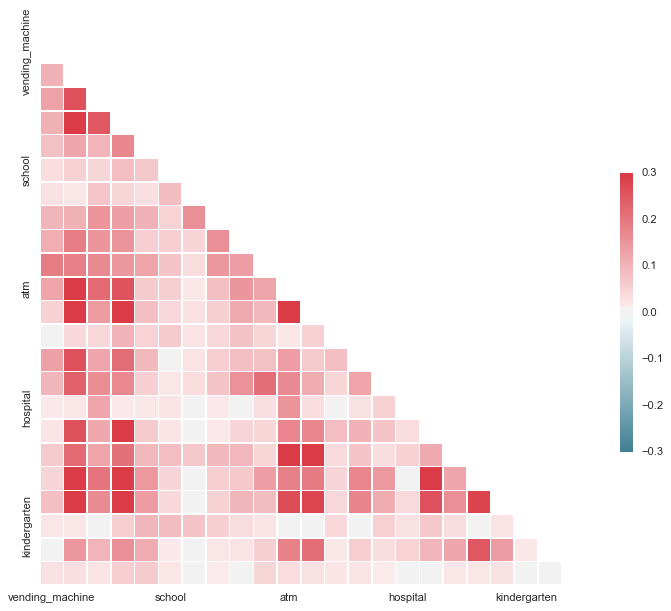

In [21]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [ ]:
sns.pairplot(pois)

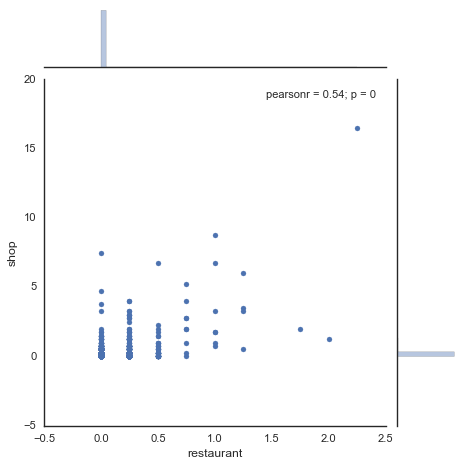

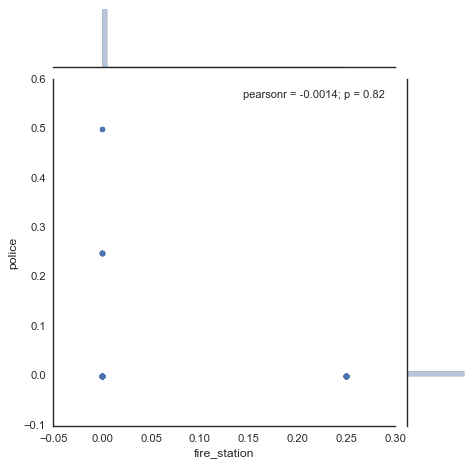

In [23]:
x1, y1 = pois['restaurant'], pois['shop'] # example with high correlation of attributes
x2, y2 = pois['fire_station'], pois['police'] # example with low correlation of attributes
sns.jointplot(x1, y1, kind='scatter')
sns.jointplot(x2, y2, kind='scatter')

In [18]:
pois.to_csv('/Users/rudimac/Documents/MTEC/THESIS/FEATURES/point_of_interests/pois_no_buffer.csv')